In [282]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

In [283]:
# a) Generation of the data
def generate_dataset(num_samples=1000):
    images = []
    labels = []

    for _ in range(num_samples):
        shape = (50, 50, 1)
        image = np.zeros(shape, dtype=np.uint8)
        num_bars = 10
        is_vertical = np.random.randint(2)  # 0 for horizontal, 1 for vertical

        for _ in range(num_bars):
            bar_length = 10
            
            if is_vertical:
                x_start = np.random.randint(shape[1])  # Random starting position
                y_start = np.random.randint(shape[0] - bar_length)
                image[y_start:y_start + bar_length, x_start, 0] = 255
            else:
                x_start = np.random.randint(shape[1] - bar_length)  # Random starting position
                y_start = np.random.randint(shape[0])
                image[y_start, x_start:x_start + bar_length, 0] = 255

        images.append(image)
        labels.append(is_vertical)
        
    return np.array(images), np.array(labels)

In [284]:
# Generate datasets
train_images, train_labels = generate_dataset(1000)
val_images, val_labels = generate_dataset(1000)

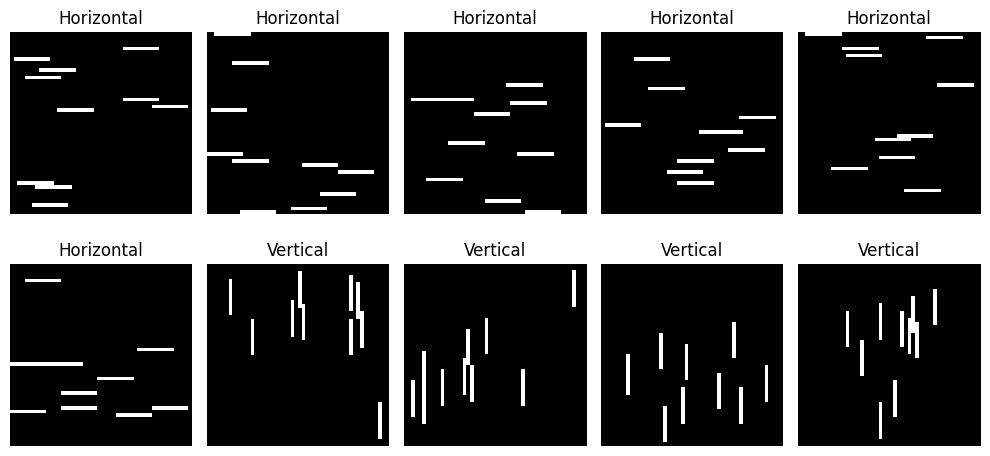

In [285]:
num_images = 10
fig, axes = plt.subplots(2, num_images // 2, figsize=(10, 5))
axes = axes.flatten() # Flatten der 2D-Array der Axes zu einem 1D-Array für einfacheren Zugriff

for i in range(num_images):
    ax = axes[i]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title("Vertical" if train_labels[i] == 1 else "Horizontal")
    ax.axis('off') 

plt.tight_layout()
plt.show()

In [286]:
# b) Build the simplest possible CNN
def build_cnn():
    model = Sequential()
    model.add(Conv2D(filters=1, kernel_size=(5, 5), input_shape=(50, 50, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(46, 46)))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))

    return model

In [287]:
# Build the model
model = build_cnn()
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 46, 46, 1)         26        
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 1, 1, 1)           0         
 ng2D)                                                           
                                                                 
 flatten_24 (Flatten)        (None, 1)                 0         
                                                                 
 dense_24 (Dense)            (None, 2)                 4         
                                                                 
Total params: 30 (120.00 Byte)
Trainable params: 30 (120.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [288]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [289]:
# Train the model
train_images = train_images / 255.0
val_images = val_images / 255.0
history = model.fit(x=train_images, y=train_labels, epochs=40, validation_data=(val_images, val_labels))

Epoch 1/40
32/32 [==============================] - 1s 14ms/step - loss: 0.6891 - accuracy: 0.4990 - val_loss: 0.6754 - val_accuracy: 0.5210
Epoch 2/40
32/32 [==============================] - 0s 8ms/step - loss: 0.6694 - accuracy: 0.4990 - val_loss: 0.6541 - val_accuracy: 0.5210
Epoch 3/40
32/32 [==============================] - 0s 8ms/step - loss: 0.6457 - accuracy: 0.4990 - val_loss: 0.6263 - val_accuracy: 0.5210
Epoch 4/40
32/32 [==============================] - 0s 8ms/step - loss: 0.6152 - accuracy: 0.6290 - val_loss: 0.5923 - val_accuracy: 0.8410
Epoch 5/40
32/32 [==============================] - 0s 7ms/step - loss: 0.5793 - accuracy: 0.9070 - val_loss: 0.5530 - val_accuracy: 0.9340
Epoch 6/40
32/32 [==============================] - 0s 9ms/step - loss: 0.5373 - accuracy: 0.9710 - val_loss: 0.5056 - val_accuracy: 1.0000
Epoch 7/40
32/32 [==============================] - 0s 8ms/step - loss: 0.4871 - accuracy: 1.0000 - val_loss: 0.4558 - val_accuracy: 1.0000
Epoch 8/40
32/32 [=

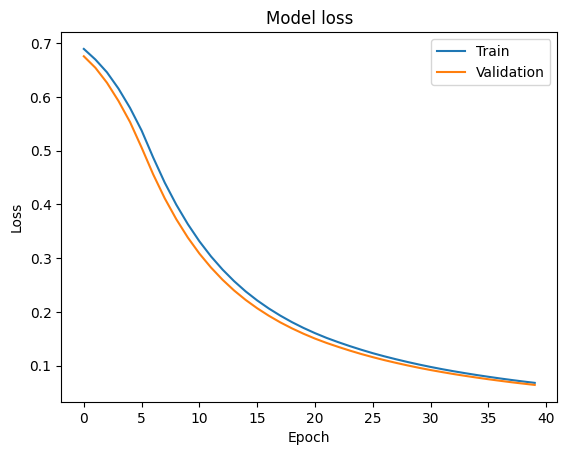

In [290]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

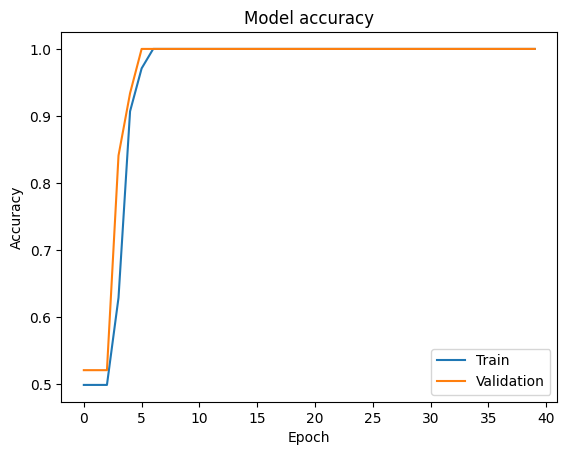

In [291]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(5, 5)


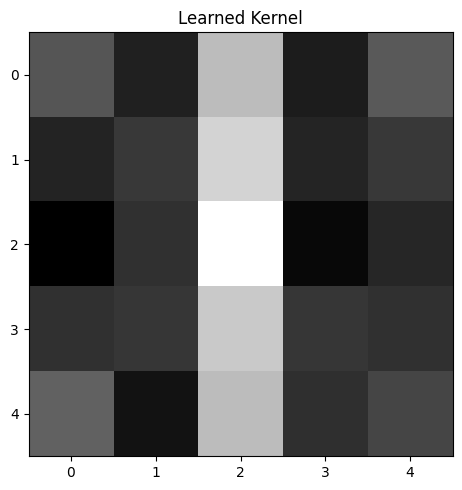

In [292]:
# c) Visualize the learned kernel
weights = model.get_weights()[0]
print(weights.squeeze().shape)
plt.figure(figsize=(5, 5))
plt.imshow(weights.squeeze(), cmap='gray')
plt.title('Learned Kernel')
plt.tight_layout()
plt.show()